# &#128286;YouTube ÎåìÍ∏ÄÎ∂ÑÏÑùÌïòÍ∏∞!

    1. Google APIÎ°ú ÎåìÍ∏ÄÏùÑ JSONÌòïÏãùÏúºÎ°ú Î∞õÏïÑÏò®Îã§.
    
    2. JSONÏùÑ PandasÎ°ú Î≥ÄÌôòÌïú Îí§ CSVÎ°ú Ï†ÄÏû•ÌïòÏó¨ Ï≤òÎ¶¨ÌïúÎã§.

In [3]:
# YouTube API Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú ÌõÑ JSON Ï†ÄÏû•
# pip install python-dotenv
# pip install --upgrade google-api-python-client
import json
import pandas as pd
import googleapiclient.discovery
from dotenv import dotenv_values


import json
import pandas as pd
import googleapiclient.discovery
from dotenv import dotenv_values


def get_api_key():
    ''' 
    Youtube API Key
    '''
    config = dotenv_values(".env")
    return config['API_KEY']


# total comments
total_data = []


def get_data(count=999999, nextPageToken=""):
    '''
    Change YOUR_API_KEY!!!
    Recursively receive data as much as maxResults through API. 
    Limit API calls to count parameter.
    '''
    # Check count
    if count < 1:
        print("[INFO] Count End.")
        return

    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    # os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = get_api_key()  # "YOUR_API_KEY"

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey=DEVELOPER_KEY)

    # Document reference
    # example >> part="id, snippet, replies", maxResults=20, order="relevance", pageToken=nextPageToken, videoId="HNObBsbvxOk",
    request = youtube.commentThreads().list(
        part="id, snippet, replies",
        maxResults=100,
        order="relevance",
        pageToken=nextPageToken,
        videoId="Bb5DKSx5jTI",
    )
    response = request.execute()

    print(f"************** {count} times left. **************")

    # print(response)

    # append response to total_data
    total_data.append(response)

    # Call recursive when nextPageToken is exist.
    if "nextPageToken" in response:
        get_data(count-1, response["nextPageToken"])
    else:
        print("[End] No more comments.")

In [4]:
def save_response_to_json_file(filepath):
    # save response to JSON file.
    json_data = {"responses": total_data}
    with open(filepath, 'w', encoding='utf-8') as make_file:
        json.dump(json_data, make_file, indent="\t", ensure_ascii=False)
        print("[INFO] JSON file Saved.")


def open_json_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        json_file = json.load(f)
    return json_file

In [5]:
# JSON Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏõêÌïòÎäî Ï†ïÎ≥¥Îßå Ï∂îÏ∂úÌïòÏó¨ pandas ÌõÑ csvÎ°ú Ï†ÄÏû•
def json_file_to_pandas_csv(json_file, filepath):
    print("[INFO] JSON to Pandas Started.")
    json_responses = json_file["responses"]

    videoId = []
    item_type = []  # 0: comment, 1: replie
    textDisplay = []
    textOriginal = []
    authorDisplayName = []
    authorChannelUrl = []
    likeCount = []
    # isBad = []

    for json_data in json_responses:
        items = json_data["items"]

        for item in items:
            comment_videoId = item["snippet"]["videoId"]
            comment_textDisplay = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            comment_textOriginal = item["snippet"]["topLevelComment"]["snippet"]["textOriginal"]
            comment_authorDisplayName = item["snippet"]["topLevelComment"]["snippet"]["authorDisplayName"]
            comment_authorChannelUrl = item["snippet"]["topLevelComment"]["snippet"]["authorChannelUrl"]
            comment_likeCount = item["snippet"]["topLevelComment"]["snippet"]["likeCount"]
            comment_totalReplyCount = item["snippet"]["totalReplyCount"]

            videoId.append(comment_videoId)
            item_type.append(0)
            textDisplay.append(comment_textDisplay)
            textOriginal.append(comment_textOriginal)
            authorDisplayName.append(comment_authorDisplayName)
            authorChannelUrl.append(comment_authorChannelUrl)
            likeCount.append(comment_likeCount)

            if comment_totalReplyCount != 0:
                replies = item["replies"]["comments"]

                for replie in replies:
                    replie_videoId = replie["snippet"]["videoId"]
                    replie_textDisplay = replie["snippet"]["textDisplay"]
                    replie_textOriginal = replie["snippet"]["textOriginal"]
                    replie_authorDisplayName = replie["snippet"]["authorDisplayName"]
                    replie_authorChannelUrl = replie["snippet"]["authorChannelUrl"]
                    replie_likeCount = replie["snippet"]["likeCount"]

                    videoId.append(replie_videoId)
                    item_type.append(1)
                    textDisplay.append(replie_textDisplay)
                    textOriginal.append(replie_textOriginal)
                    authorDisplayName.append(replie_authorDisplayName)
                    authorChannelUrl.append(replie_authorChannelUrl)
                    likeCount.append(replie_likeCount)

    data = {'videoId': videoId, 'item_type': item_type, 'authorDisplayName': authorDisplayName,
            'textDisplay': textDisplay, 'textOriginal': textOriginal, 'authorChannelUrl': authorChannelUrl, 'likeCount': likeCount}

    df = pd.DataFrame(data)
    # df["category"] = "game"
    df["isBad"] = 0
    # print(df.tail())

    print("[INFO] JSON to Pandas Finished.")
    df.to_csv(filepath)
    print("[INFO] CSV File save Finished.")

In [ ]:
get_data(1)
save_response_to_json_file("data/json/sample.json")
json_file = open_json_file("data/json/sample.json")
json_file_to_pandas_csv(json_file, "data/csv/sample.csv")
print("[INFO] Finished.")

    + ÎèôÏòÅÏÉÅ 1~10ÍπåÏßÄ categoryÎ≥ÑÎ°ú Ï†ÄÏû•Ìïú Í≤ÉÎì§ÏùÑ Ìï©ÏπúÎã§.

In [ ]:
# Ïù∏Í∏∞ÎèôÏòÅÏÉÅ Î™®Îëê Î≥ëÌï©
import pandas as pd

data = []

for i in range(1, 11):
    path = "data/csv/popular_new_" + str(i) + ".csv"
    df = pd.read_csv(path)
    data.append(df)

finalDf = pd.concat(data)
finalDf.to_csv("data/csv/popular_new_sum.csv")

In [2]:
import pandas as pd
df = pd.read_csv("data/csv/04-26/popular_final_sum.csv")
df[:5]

Unnamed: 0      videoId  item_type authorDisplayName  \
0           0  K7qKmZn0XfE          0             big k   
1           1  K7qKmZn0XfE          1              ÎØ∏ÏÖòÌéòÏù¥   
2           2  K7qKmZn0XfE          0               ÏûÑÏ∂©Ìù¨   
3           3  K7qKmZn0XfE          1             Í≥ºÏó∞ ÌÄ¥Ï¶à   
4           4  K7qKmZn0XfE          0               ÍπÄÎÇ®Ïù¥   

                                         textDisplay  \
0  ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥<br />Î≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏<br />Ïûò ÏßÄÎÉàÏäµÎãàÎã§<br /...   
1                                 Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^   
2  Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî<br />Ìï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£º...   
3                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú   
4  Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤òÎüº Ìñâ...   

                                        textOriginal  \
0  ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥\nÎ≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏\nÏûò ÏßÄÎÉàÏäµÎãàÎã§\nÍ∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏù¥. Ìïò...   
1                                 Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^   
2  Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî\nÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£ºÏÑ∏Ïöî.\...   
3                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú   
4  Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤òÎüº Ìñâ...   

                                    authorChannelUrl  likeCount category  \
0  http://www.youtube.com/channel/UCjDN0NP-BJ1WEP...      151.0      new   
1  http://www.youtube.com/channel/UCXk7WVpUdr9In1...        0.0      new   
2  http://www.youtube.com/channel/UCajvtubq_aEsGh...      669.0      new   
3  http://www.youtube.com/channel/UCA8pGSJzLLhRtk...        5.0      new   
4  http://www.youtube.com/channel/UCbt9l09yFRsvy5...      664.0      new   

   isBad  
0    0.0  
1    1.0  
2    0.0  
3    1.0  
4    0.0

    + ÎÇòÏÅú ÎåìÍ∏Ä ÏàòÎ•º Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú ÏûëÏóÖ

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
# categoryÍ∞Ä newÏù∏ Í≤ÉÎßå Í≤ÄÏÉâ
is_category_new = df['category'] == 'new'
category_new = df[is_category_new]
# category_new.head()

In [20]:
# categoryÍ∞Ä musicÏù∏ Í≤ÉÎßå Í≤ÄÏÉâ
is_category_music = df['category'] == 'music'
category_music = df[is_category_music]
# category_music.head()

In [21]:
# categoryÍ∞Ä game Í≤ÉÎßå Í≤ÄÏÉâ
is_category_game = df['category'] == 'game'
category_game = df[is_category_game]
# category_game.head()

In [22]:
# category new ÎåìÍ∏Ä Ïàò
total_category_new = category_new['isBad'].count()
category_new_bad = category_new['isBad'] == 1
total_category_new_bad = category_new[category_new_bad]['isBad'].count()
print(total_category_new, total_category_new_bad)

1895 79


In [23]:
# category music ÎåìÍ∏Ä Ïàò
total_category_music = category_music['isBad'].count()
category_music_bad = category_music['isBad'] == 1
total_category_music_bad = category_music[category_music_bad]['isBad'].count()
print(total_category_music, total_category_music_bad)

1915 0


In [24]:
# category game ÎåìÍ∏Ä Ïàò
total_category_game = category_game['isBad'].count()
category_game_bad = category_game['isBad'] == 1
total_category_game_bad = category_game[category_game_bad]['isBad'].count()
print(total_category_game, total_category_game_bad)

1595 51


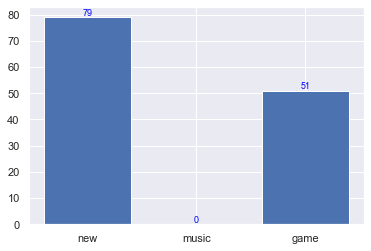

In [25]:
x = ['new', 'music', 'game']
y = [total_category_new_bad, total_category_music_bad, total_category_game_bad]

plt.bar(x, y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # Ï¢åÌëú (xÏ∂ï = v, yÏ∂ï = y[0]..y[1], ÌëúÏãú = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

# &#128198;(04-26, 05-17, 05-28) ÎÇ†Ïßú ÎåìÍ∏Ä Ï∂îÍ∞ÄÏàòÏßë
# + music Ïπ¥ÌÖåÍ≥†Î¶¨Îäî Ï†úÏô∏

In [69]:
# Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [70]:
df = pd.read_csv("data/csv/04-26/popular_final_sum.csv")
df2 =  pd.read_csv("data/csv/05-17/popular_final_without_music_sum.csv")
df3 = pd.read_csv("data/csv/05-28/popular_final_without_music_sum.csv")
df2[-5:]

Unnamed: 0      videoId  item_type authorDisplayName  \
3630        3630  Bb5DKSx5jTI          0              Ïä¨ÎùºÏù¥ÎØÄ   
3631        3631  Bb5DKSx5jTI          0       ÎÖ∏ÎûòÍ∞ÄÏÇ¨ ÏïåÎ†§Ï£ºÎäîÏÇ¨Îûå   
3632        3632  Bb5DKSx5jTI          1               Ï†ïÌïòÏú®   
3633        3633  Bb5DKSx5jTI          0        ÎåÄÏïÖÎßà ÎààÍπîÎåÄÏû•Î£®Ìîº   
3634        3634  Bb5DKSx5jTI          0               Î≥ÄÍ∑úÌÉú   

                                            textDisplay  \
3630  <a href="https://www.youtube.com/watch?v=Bb5DK...   
3631                                     Î∞∞Îìú(bed)ÎùΩ(rock)   
3632                                                 ÏïÑ!   
3633                                         ÎÑàÎ¨¥Ïû¨Î∞åÍ≤†Îã§..!!   
3634                                             Ìò∏Î∞ïÏßë„Öã„Öã„Öã   

                                textOriginal  \
3630  7:51 ÏòõÎÇ†Ïóê Ìïú??Îãò ÏûêÏó∞Ïû¨Ìï¥ÏóêÏÑú ÏÇ¥ÏïÑÎÇ®ÏùÑÎ†§Í≥† ÌñàÎçòÍ≤É Í∞ôÏùÄÎç∞...   
3631                          Î∞∞Îìú(bed)ÎùΩ(rock)   
3632                                      ÏïÑ!   
3633                              ÎÑàÎ¨¥Ïû¨Î∞åÍ≤†Îã§..!!   
3634                                  Ìò∏Î∞ïÏßë„Öã„Öã„Öã   

                                       authorChannelUrl  likeCount category  \
3630  http://www.youtube.com/channel/UC2fNlqrRiGPJ2I...          0     game   
3631  http://www.youtube.com/channel/UCYRsQLlW3OOmXQ...          2     game   
3632  http://www.youtube.com/channel/UCf9Zy9XxvlCDYj...          0     game   
3633  http://www.youtube.com/channel/UCtIbI1ASGUF1GS...          0     game   
3634  http://www.youtube.com/channel/UCgBprHJEiq2RC5...          0     game   

      isBad  
3630      0  
3631      0  
3632      0  
3633      0  
3634      0

In [71]:
# newÎûë gameÎßå ÌïòÍ∏∞Î°ú Ìï®

category_new = df[df['category'] == 'new']
category_new2 = df2[df2['category'] == 'new']
category_new3 = df3[df3['category'] == 'new']
category_game = df[df['category'] == 'game']
category_game2 = df2[df2['category'] == 'game']
category_game3 = df3[df3['category'] == 'game']

category_new_bad = category_new[category_new['isBad'] == 1]['isBad'].count()
category_new_bad2 = category_new2[category_new2['isBad'] == 1]['isBad'].count()
category_new_bad3 = category_new3[category_new3['isBad'] == 1]['isBad'].count()

category_game_bad = category_game[category_game['isBad'] == 1]['isBad'].count()
category_game_bad2 = category_game2[category_game2['isBad'] == 1]['isBad'].count()
category_game_bad3 = category_game3[category_game3['isBad'] == 1]['isBad'].count()

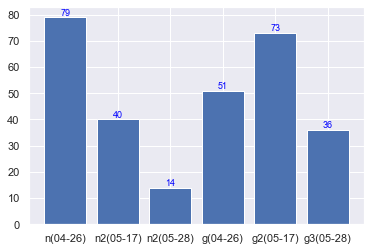

In [72]:
x = ['n(04-26)', 'n2(05-17)', 'n2(05-28)', 'g(04-26)', 'g2(05-17)', 'g3(05-28)']
y = [category_new_bad, category_new_bad2, category_new_bad3, category_game_bad, category_game_bad2, category_game_bad3]

plt.bar(x, y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # Ï¢åÌëú (xÏ∂ï = v, yÏ∂ï = y[0]..y[1], ÌëúÏãú = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

# &#128127;Íæ∏Ï§ÄÌïòÍ≤å ÎÇòÏÅú ÎåìÍ∏Ä Ï°¥Ïû¨
# &#128101;ÎÇ†ÏßúÎ≥Ñ ÏûëÏÑ±Ïûê ÎπàÎèÑ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [77]:
# ÎÇ†ÏßúÎ≥ÑÎ°ú isBad==1Ïù∏ authorDisplayNameÎ•º ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
isBad_author = df[df['isBad'] == 1]["authorDisplayName"]
isBad_author2 = df2[df2['isBad'] == 1]["authorDisplayName"]
isBad_author3 = df3[df3['isBad'] == 1]["authorDisplayName"]
text_isBad_author = isBad_author.values.tolist()
text_isBad_author2 = isBad_author2.values.tolist()
text_isBad_author3 = isBad_author3.values.tolist()

In [78]:
from collections import Counter

dict_isBad_author = dict(Counter(text_isBad_author))
dict_isBad_author2 = dict(Counter(text_isBad_author2))
dict_isBad_author3 = dict(Counter(text_isBad_author3))

In [79]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

youtube_mask = np.array(Image.open("wordcloud/youtubemask.png"))

wordcloud = WordCloud(
    font_path='wordcloud/NanumSquareRoundB.ttf', 
    width=800, height=800, background_color='black', mask= youtube_mask
)
wordcloud = wordcloud.generate_from_frequencies(dict_isBad_author)
# wordcloud2 = wordcloud.generate_from_frequencies(dict_isBad_author2)
# wordcloud3 = wordcloud.generate_from_frequencies(dict_isBad_author3)

# &#128696;04-26 ÏûëÏÑ±ÏûêÎì§

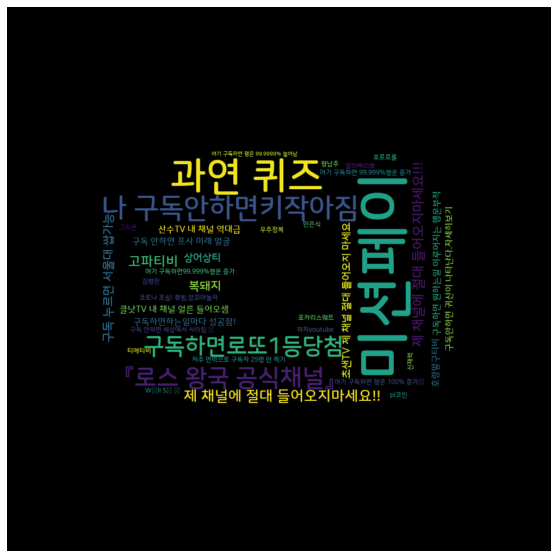

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.grid(False); plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()
# fig.savefig('wordcloud/wordcloud0528.png')

# &#128696;05-17 ÏûëÏÑ±ÏûêÎì§

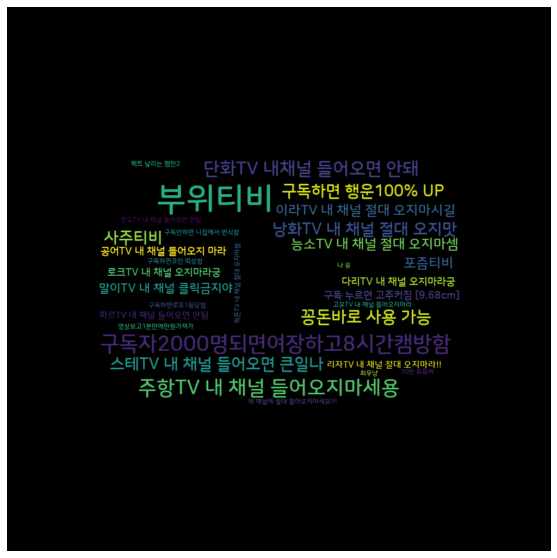

In [81]:
wordcloud2 = wordcloud.generate_from_frequencies(dict_isBad_author2)
fig = plt.figure(figsize=(10, 10))
plt.grid(False); plt.axis("off")
plt.imshow(wordcloud2, interpolation="bilinear") 
plt.show()

# &#128696;05-28 ÏûëÏÑ±ÏûêÎì§

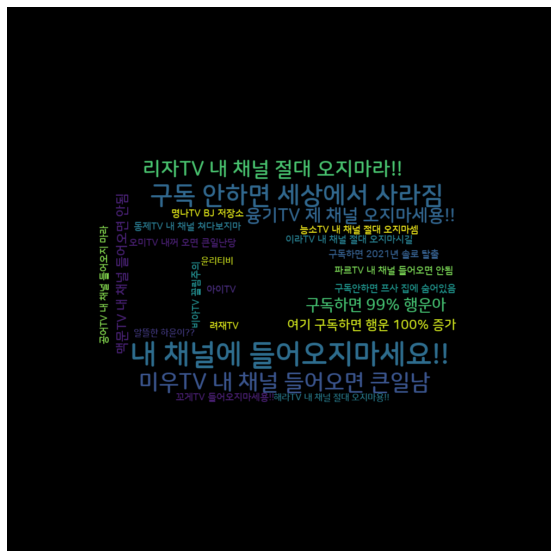

In [82]:
wordcloud3 = wordcloud.generate_from_frequencies(dict_isBad_author3)
fig = plt.figure(figsize=(10, 10))
plt.grid(False); plt.axis("off")
plt.imshow(wordcloud3, interpolation="bilinear") 
plt.show()

# &#9984;&#128069;ÎåìÍ∏ÄÎÇ¥Ïö© Î∂ÑÏÑù!

In [83]:
# ÎÇ†ÏßúÎ≥ÑÎ°ú isBad==1Ïù∏ textOriginal Ï∂îÏ∂ú
isBad_textOriginal = df[df['isBad'] == 1]["textOriginal"]
isBad_textOriginal2 = df2[df2['isBad'] == 1]["textOriginal"]
isBad_textOriginal3 = df3[df3['isBad'] == 1]["textOriginal"]
isBad_textOriginal = isBad_textOriginal.values.tolist()
text_isBad_textOriginal2 = isBad_textOriginal2.values.tolist()
text_isBad_textOriginal3 = isBad_textOriginal3.values.tolist()
isBad_textOriginal[:20]

['Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 "ÎÇ®ÎÖÄÍ∞àÎì±/Ïó¨Í∞ÄÎ∂Ä/Ïó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ ' Î°úÏä§ÏôïÍµ≠ ' \nÍµ¨ÎèÖ=ÏãúÎØºÍ∂åÏûÖÎãàÎã§...",
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 "ÎÇ®ÎÖÄÍ∞àÎì±/Ïó¨Í∞ÄÎ∂Ä/Ïó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ ' Î°úÏä§ÏôïÍµ≠ ' \nÍµ¨ÎèÖ=ÏãúÎØºÍ∂åÏûÖÎãàÎã§...",
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 'https://youtu.be/_ZKl-tZyiRM',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú.',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú.',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú.',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^',
 "ÎÇ®ÎÖÄÍ∞àÎì±/Ïó¨Í∞ÄÎ∂Ä/Ïó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ '

In [84]:
import re
# ÌïúÍ∏Ä Í≥µÎ∞± ÎÇ®ÍπÄ, ÏûêÏùå Î™®Ïùå Ï†úÍ±∞  
pattern = '[^Í∞Ä-Ìû£ ]|[\t\n\r\f\v]|([„Ñ±-„Öé„Öè-„Ö£]+)'
isBad_textOriginal_r = [re.sub(pattern, '', x) for x in isBad_textOriginal]
isBad_textOriginal2_r = [re.sub(pattern, '', x) for x in isBad_textOriginal2]
isBad_textOriginal3_r = [re.sub(pattern, '', x) for x in isBad_textOriginal3]
isBad_textOriginal_r[:20]

['Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ  Î°úÏä§ÏôïÍµ≠  Íµ¨ÎèÖÏãúÎØºÍ∂åÏûÖÎãàÎã§',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ  Î°úÏä§ÏôïÍµ≠  Íµ¨ÎèÖÏãúÎØºÍ∂åÏûÖÎãàÎã§',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 '',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú',
 'Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî',
 'ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ  Î°úÏä§ÏôïÍµ≠  Íµ¨ÎèÖÏãúÎØºÍ∂åÏûÖÎãàÎã§',
 'Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú']

# &#128548;ÌïúÍµ≠Ïñ¥ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ìå®ÌÇ§ÏßÄ konlpy
# &#128640;Îπ†Î•∏ MecabÏúºÎ°ú Î™ÖÏÇ¨Î•º Ï∂îÏ∂úÌï¥Î≥¥Ïûê!

### Ï∞∏Í≥†ÎßÅÌÅ¨(ÏÑ§Ïπò)
    MecabÎ∂ÄÌÑ∞ ÍπîÏïÑÎ≥¥Í≥† konlpy ÍπîÎ©¥ Í∏àÎ∞©Ìï®. konlpy ÍπîÎ©¥ÏÑú ÏÇΩÏßà ÏóÑÏ≤≠Ìï®...
#### 1. [Mecab ÏÑ§Ïπò](https://hong-yp-ml-records.tistory.com/91 "Mecab")
#### 2. [Konlpy ÏÑ§Ïπò](https://sdkim817.wordpress.com/2020/01/30/konlpy-%EC%84%A4%EC%B9%98-%EB%B0%8F-%EC%9D%B4%EC%9A%A9/ "Konlpy")  

In [85]:
# ÌïúÍµ≠Ïñ¥ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ìå®ÌÇ§ÏßÄ konlpy + ÏÜçÎèÑÎπ†Î•∏? Mecab ÏÑ§Ïπò 
from konlpy.tag import Mecab 
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

print(isBad_textOriginal_r[1])
mecab.nouns(isBad_textOriginal_r[1])

Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú


['Íµ¨ÎèÖ', 'ÏÜîÎ°ú']

    + ÎåìÍ∏ÄÎÇ¥Ïö©ÏóêÏÑú Î™ÖÏÇ¨Îßå Ï∂îÏ∂úÌï¥Î≥¥Ïûê~

In [86]:
is_Bad_nouns = []
for text in isBad_textOriginal_r:
    is_Bad_nouns.extend(list(mecab.nouns(text)))
for text in isBad_textOriginal2_r:
    is_Bad_nouns.extend(list(mecab.nouns(text))) 
for text in isBad_textOriginal3_r:
    is_Bad_nouns.extend(list(mecab.nouns(text)))    
print(is_Bad_nouns[:10])
print(is_Bad_nouns[-10:])

['Ï†ú', 'Ï≤¥', 'ÎÑê', 'Î¨¥Î£å', 'Îèà', 'Î≤ÑÏÑ∏', 'Íµ¨ÎèÖ', 'ÏÜîÎ°ú', 'Ï†ú', 'Ï≤¥']
['ÏÉ§ÏßÑ', 'ÏßÑÏã¨', 'Î∞©ÏÜ°', 'ÏùòÏÉÅ', 'ÎìØ', 'ÎÇ¥', 'Ïàò', 'Ï¢åÌëú', 'Í≤å', 'ÏÉ§ÏßÑ']


    + Ìïú Í∏ÄÏûêÎäî Îã§ ÏßÄÏö∞Í∏∞

In [87]:
is_Bad_nouns = [x for x in is_Bad_nouns if len(x) > 1]
print(is_Bad_nouns[:10])
print(is_Bad_nouns[-10:])

['Î¨¥Î£å', 'Î≤ÑÏÑ∏', 'Íµ¨ÎèÖ', 'ÏÜîÎ°ú', 'Î¨¥Î£å', 'Î≤ÑÏÑ∏', 'ÎÇ®ÎÖÄ', 'Í∞àÎì±', 'Í∞àÎì±', 'Í∞ÄÍµ≠']
['ÏÉ§ÏßÑ', 'ÏÉ§ÏßÑ', 'ÏÉ§ÏßÑ', 'ÏÉ§ÏßÑ', 'ÏÉ§ÏßÑ', 'ÏßÑÏã¨', 'Î∞©ÏÜ°', 'ÏùòÏÉÅ', 'Ï¢åÌëú', 'ÏÉ§ÏßÑ']


    + Î™ÖÏÇ¨ ÎπàÎèÑ ÌååÏïÖÌïòÍ∏∞

In [88]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
sns.set()

nouns_counter = Counter(is_Bad_nouns)
top_nouns = dict(nouns_counter.most_common(30))
top_nouns

{'Î∞©ÏÜ°': 55,
 'Íµ¨ÎèÖ': 48,
 'Ï±ÑÎÑê': 39,
 'Î¨¥Î£å': 37,
 'Ïó∞ÏäµÏÉù': 36,
 'ÎÇ¥Ïú†': 35,
 'Ï∂úÏã†': 34,
 'ÎåìÍ∏Ä': 29,
 'ÏïÑÏù¥Îèå': 24,
 'Í∑∏Î£π': 22,
 'ÌïòÎ£®': 20,
 'ÏÉ§ÏßÑ': 20,
 'ÏßëÏ§ë': 17,
 'ÏÇ¨Í≥†': 17,
 'ÌÖêÏÖò': 17,
 'Ïû•ÎÇú': 17,
 'Î≤ÑÏÑ∏': 16,
 'ÌòÑÏßà': 16,
 'ÌòÑÏßÅ': 16,
 'ÎãπÏã†': 15,
 'Ï†ÄÏ£º': 15,
 'Í∞àÎì±': 14,
 'ÌñâÏö¥': 14,
 'ÌîÑÎ°úÌïÑ': 14,
 'Î≥µÎèºÏßÄ': 13,
 'Í∞ÄÏö©': 13,
 'ÏÜîÎ°ú': 12,
 'Ïú†ÌäúÎ∏å': 12,
 'ÏàòÍ≥†': 12,
 'Î∞©Ï£º': 12}

# &#128202;ÏÉÅÏúÑ 30Í∞ú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏

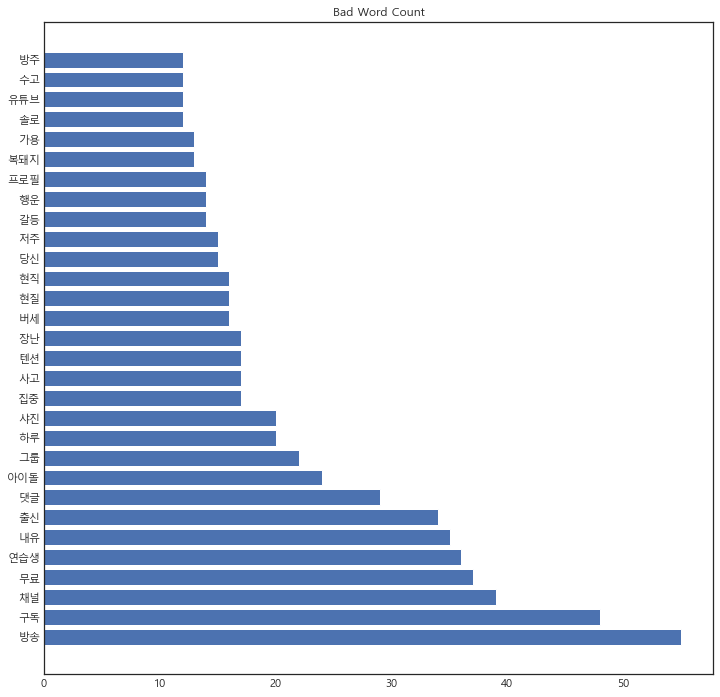

In [89]:
import numpy as np
plt.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú Ìè∞Ìä∏ ÏÑ§Ï†ï
matplotlib.rcParams['axes.unicode_minus'] = False #ÎßàÏù¥ÎÑàÏä§(-) Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Bad Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

# &#128530;ÏÉÅÏúÑ ÎåìÍ∏ÄÏùÑ Ï∞®Îã®Îêú Îã®Ïñ¥Ïóê Îì±Î°ùÌïòÎ©¥ Ï¢ãÏùÑÏßÄÎèÑ?
![Ï∞®Îã®ÎåìÍ∏Ä](wordcloud/bencomment.png )
# &#128531;Í∑∏Îüº Í∞ôÏù¥ Ï†ïÏÉÅÏ†ÅÏù∏ ÎåìÍ∏ÄÎèÑ...

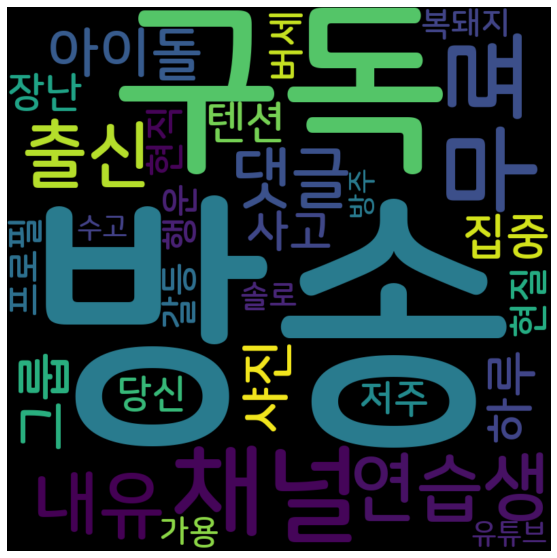

In [314]:
wordcloud = WordCloud(
    font_path='wordcloud/NanumSquareRoundB.ttf', 
    width=800, height=800
)
wordcloud = wordcloud.generate_from_frequencies(top_nouns)

fig = plt.figure(figsize=(10, 10))
plt.grid(False); plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()

# Îî•Îü¨ÎãùÏùÑ Ïù¥Ïö©Ìïú ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨
# &#128584; CNNÏùÑ Ïù¥Ïö©Ìïú Ïä§Ìå∏ Î©îÏùº Î∂ÑÎ•ò Î™®Îç∏ -> ÎåìÍ∏Ä Î∂ÑÎ•òÎ°ú???

### Ï∞∏Í≥†

- [Ïú†ÌäúÎ∏å - Ïù¥ÏàòÏïàÏª¥Ìì®ÌÑ∞Ïó∞Íµ¨ÏÜå](https://www.youtube.com/watch?v=QejZQ0Dh5x8&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=11 "CNN spam video")

- [wikidocs - Îî•Îü¨ÎãùÏùÑÏù¥Ïö©ÌïúÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ÏûÖÎ¨∏ ](https://wikidocs.net/80783 "CNN spam wikidocs")

In [173]:
# Î∂ÑÎ•ò
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# &#127793;&#128703;ÎåìÍ∏Ä Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞
    1. ÏàòÏßëÌïú Î™®Îì† ÎåìÍ∏Ä Í∞ÄÏ†∏Ïò§Í∏∞
    
    2. ÏûëÏÑ±ÏûêÏôÄ ÎåìÍ∏ÄÎÇ¥Ïö©ÏùÑ Ìï©Ïπú Ïó¥ ÏÉùÏÑ±ÌïòÍ∏∞

In [131]:
data = pd.read_csv("data/csv/popular_final_sum.csv")
data["authorAndTextOriginal"] = data["authorDisplayName"] + " " + data["textOriginal"]
data = data.astype({"isBad": 'int',
                    "authorAndTextOriginal" : "str"})
data.head()

Unnamed: 0      videoId  item_type authorDisplayName  \
0           0  K7qKmZn0XfE          0             big k   
1           1  K7qKmZn0XfE          1              ÎØ∏ÏÖòÌéòÏù¥   
2           2  K7qKmZn0XfE          0               ÏûÑÏ∂©Ìù¨   
3           3  K7qKmZn0XfE          1             Í≥ºÏó∞ ÌÄ¥Ï¶à   
4           4  K7qKmZn0XfE          0               ÍπÄÎÇ®Ïù¥   

                                         textDisplay  \
0  ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥<br />Î≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏<br />Ïûò ÏßÄÎÉàÏäµÎãàÎã§<br /...   
1                                 Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^   
2  Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî<br />Ìï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£º...   
3                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú   
4  Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤òÎüº Ìñâ...   

                                        textOriginal  \
0  ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥\r\nÎ≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏\r\nÏûò ÏßÄÎÉàÏäµÎãàÎã§\r\nÍ∑∏ÎèôÏïà Í≥†...   
1                                 Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^   
2  Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî\r\nÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£ºÏÑ∏Ïöî...   
3                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú   
4  Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤òÎüº Ìñâ...   

                                    authorChannelUrl  likeCount category  \
0  http://www.youtube.com/channel/UCjDN0NP-BJ1WEP...      151.0      new   
1  http://www.youtube.com/channel/UCXk7WVpUdr9In1...        0.0      new   
2  http://www.youtube.com/channel/UCajvtubq_aEsGh...      669.0      new   
3  http://www.youtube.com/channel/UCA8pGSJzLLhRtk...        5.0      new   
4  http://www.youtube.com/channel/UCbt9l09yFRsvy5...      664.0      new   

   isBad                              authorAndTextOriginal  
0      0  big k ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥\r\nÎ≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏\r\nÏûò ÏßÄÎÉàÏäµÎãàÎã§\r\...  
1      1                            ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^  
2      0  ÏûÑÏ∂©Ìù¨ Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî\r\nÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥...  
3      1                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú  
4      0  ÍπÄÎÇ®Ïù¥ Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏à...

In [132]:
# ÌïÑÏöîÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú
del data["videoId"]
del data["item_type"]
del data["authorDisplayName"]
del data["textDisplay"]
# del data["textOriginal"]
del data["authorChannelUrl"]
del data["likeCount"]
del data["category"]

data[:10]

Unnamed: 0                                       textOriginal  isBad  \
0           0  ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥\r\nÎ≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏\r\nÏûò ÏßÄÎÉàÏäµÎãàÎã§\r\nÍ∑∏ÎèôÏïà Í≥†...      0   
1           1                                 Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^      1   
2           2  Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî\r\nÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£ºÏÑ∏Ïöî...      0   
3           3                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú      1   
4           4  Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤òÎüº Ìñâ...      0   
5           5                                 Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^      1   
6           6                            ·Ü¢„Öç#@4@====@Ayden Manuel      0   
7           7  ÎÇ®ÎÖÄÍ∞àÎì±/Ïó¨Í∞ÄÎ∂Ä/Ïó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ ' Î°úÏä§ÏôïÍµ≠ ' \r\nÍµ¨ÎèÖ=...      1   
8           8  üå∑        üå∑  \r\n              üå∑         üå∑\r\n ...      0   
9           9                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú      1   

                               authorAndTextOriginal  
0  big k ÌûòÎì†ÏãúÍ∏∞. Ïó∞Ïö∞ ÌïòÏòÅÏù¥\r\nÎ≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏\r\nÏûò ÏßÄÎÉàÏäµÎãàÎã§\r\...  
1                            ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^  
2  ÏûÑÏ∂©Ìù¨ Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥Ïöî\r\nÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥...  
3                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú  
4  ÍπÄÎÇ®Ïù¥ Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§  ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏à...  
5                            ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî~^^  
6                        ÌïúÏùÄÏàô ·Ü¢„Öç#@4@====@Ayden Manuel  
7  „ÄéÎ°úÏä§ ÏôïÍµ≠ Í≥µÏãùÏ±ÑÎÑê„Äè ÎÇ®ÎÖÄÍ∞àÎì±/Ïó¨Í∞ÄÎ∂Ä/Ïó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ ' Î°ú...  
8  ÎøåÏö© üå∑        üå∑  \r\n              üå∑         üå∑\r...  
9                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú

In [133]:
len(data)

12463

    + ÎåìÍ∏ÄÎÇ¥Ïö©ÏóêÏÑú ÌïúÍ∏Ä, Í≥µÎ∞±ÏùÑ Ï†úÏô∏Ìïú ÌäπÏàòÎ¨∏Ïûê, ÏûêÏùå, Î™®Ïùå, Îã§Î•∏ Ïñ∏Ïñ¥Îäî Ï†úÍ±∞
    
    + Îã§Ï§ë Í≥µÎ∞± Ï†úÍ±∞

In [134]:
import re
# ÌïúÍ∏Ä, Í≥µÎ∞± Ï†úÏô∏ ÏòÅÏñ¥, ÏûêÏùå, Î™®Ïùå Ï†úÍ±∞
pattern = '[^Í∞Ä-Ìû£ ]|[\t\n\r\f\v]|([„Ñ±-„Öé„Öè-„Ö£]+)'
data["textOriginal"] = data["textOriginal"].map(lambda x : re.sub(pattern, '', x))
data["authorAndTextOriginal"] = data["authorAndTextOriginal"].map(lambda x : re.sub(pattern, '', x))
# Îã§Ï§ë Í≥µÎ∞± Ï†úÍ±∞
data["textOriginal"] = data["textOriginal"].map(lambda x : re.sub(' +', ' ', x))
data["authorAndTextOriginal"] = data["authorAndTextOriginal"].map(lambda x : re.sub(' +', ' ', x))
data[:10]

Unnamed: 0                                       textOriginal  isBad  \
0           0  ÌûòÎì†ÏãúÍ∏∞ Ïó∞Ïö∞ ÌïòÏòÅÏù¥Î≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏Ïûò ÏßÄÎÉàÏäµÎãàÎã§Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏù¥ ÌïòÏÖ®Í≥†ÏöîÏ¶êÍ±∞ÏõÄÍ≥º ...      0   
1           1                                    Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî      1   
2           2  Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥ÏöîÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£ºÏÑ∏ÏöîÏó∞Ïö∞ Ìïò...      0   
3           3                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú      1   
4           4  Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§ ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤òÎüº ÌñâÎ≥µ...      0   
5           5                                    Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî      1   
6           6                                                         0   
7           7          ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ Î°úÏä§ÏôïÍµ≠ Íµ¨ÎèÖÏãúÎØºÍ∂åÏûÖÎãàÎã§      1   
8           8                                                ÍΩÉÍ∏∏       0   
9           9                                       Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú      1   

                               authorAndTextOriginal  
0   ÌûòÎì†ÏãúÍ∏∞ Ïó∞Ïö∞ ÌïòÏòÅÏù¥Î≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏Ïûò ÏßÄÎÉàÏäµÎãàÎã§Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏù¥ ÌïòÏÖ®Í≥†ÏöîÏ¶êÍ±∞ÏõÄÍ≥º...  
1                               ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî  
2  ÏûÑÏ∂©Ìù¨ Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥ÏöîÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£ºÏÑ∏Ïöî...  
3                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú  
4  ÍπÄÎÇ®Ïù¥ Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§ ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤ò...  
5                               ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî  
6                                               ÌïúÏùÄÏàô   
7  Î°úÏä§ ÏôïÍµ≠ Í≥µÏãùÏ±ÑÎÑê ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ Î°úÏä§ÏôïÍµ≠ Íµ¨ÎèÖ...  
8                                             ÎøåÏö© ÍΩÉÍ∏∏   
9                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú

In [135]:
len(data)

12463

    + Í≥µÎ∞±Ïù¥ ÏÉùÍ∏¥ ÌñâÏùÄ Ï†úÍ±∞

In [136]:
# Í≥µÎ∞± Ìñâ Ï†úÍ±∞
data.replace('', np.nan, inplace=True)
data.replace(' ', np.nan, inplace=True)
data.dropna(inplace=True)

In [137]:
len(data)

10356

# &#127806;Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å
    + authorAndTextOriginal Ïó¥ÏùÑ Í∞ÄÏßÄÍ≥† ÏßÑÌñâ, ÎÇ¥Ïö©ÏùÄ ÏûëÏÑ±Ïûê + " " + ÎåìÍ∏ÄÎÇ¥Ïö©

In [138]:
del data["textOriginal"]
data[:20]

Unnamed: 0  isBad                              authorAndTextOriginal
0            0      0   ÌûòÎì†ÏãúÍ∏∞ Ïó∞Ïö∞ ÌïòÏòÅÏù¥Î≥¥ÎäîÏû¨ÎØ∏Ïóê Ìëπ Îπ†Ï†∏Ïûò ÏßÄÎÉàÏäµÎãàÎã§Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏù¥ ÌïòÏÖ®Í≥†ÏöîÏ¶êÍ±∞ÏõÄÍ≥º...
1            1      1                               ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî
2            2      0  ÏûÑÏ∂©Ìù¨ Í≤ΩÏôÑÎãò Í∑∏ÎèôÏïà ÎßéÏù¥ Í≥†ÎßàÏõ†Ïñ¥ÏöîÌï≠ÏÉÅ ÌñâÎ≥µÌïòÏãúÍ≥† Ïó∞Ïö∞ ÌïòÏòÅÏù¥ Î™®Ïäµ ÏûêÏ£ºÎ≥¥Ïó¨Ï£ºÏÑ∏Ïöî...
3            3      1                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú
4            4      0  ÍπÄÎÇ®Ïù¥ Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§ Í≤ΩÏôÑ Ïú§Ï†ï Ïó∞Ïö∞ÌïòÏòÅ Í∑∏ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§ ÏïûÏúºÎ°úÎèÑ ÏßÄÍ∏àÏ≤ò...
5            5      1                               ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî
7            7      1  Î°úÏä§ ÏôïÍµ≠ Í≥µÏãùÏ±ÑÎÑê ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ Î°úÏä§ÏôïÍµ≠ Íµ¨ÎèÖ...
8            8      0                                             ÎøåÏö© ÍΩÉÍ∏∏ 
9            9      1                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú
11          11      1                               ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî
12          12      1  Î°úÏä§ ÏôïÍµ≠ Í≥µÏãùÏ±ÑÎÑê ÎÇ®ÎÖÄÍ∞àÎì±Ïó¨Í∞ÄÎ∂ÄÏó¨Ïïº Îì± Í∞àÎì±Ïù¥ ÏóÜÎäî Í∞ÄÍµ≠ Ïú†ÌäúÎ∏åÍ≤ÄÏÉâ Î°úÏä§ÏôïÍµ≠ Íµ¨ÎèÖ...
13          13      1                                 Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú
14          14      0            Ïò§ÏßÄÏàò Ïñ∏Ï†úÎÇò ÏùëÏõêÌï©ÎãàÎã§Í±¥Í∞ïÌïòÏãúÍ≥† Îäò ÌñâÎ≥µÌïòÏÑ∏ÏöîÎèÑÍ≤ΩÏôÑ Ïû•Ïú§Ï†ïÎãò Ïö∏ÏßÄÎßàÏöî
15          15      0  ÏµúÏ†ïÌù¨ ÎèÑÍ≤ΩÌôòÏî® Ïû•Ïú§Ï†ïÏî® ÏÇ¨ÎûëÌï©ÎãàÎã§ Ìï≠ÏÉÅ Ïñ¥Îñ§Ïñ¥Î†§ÏõÄÏù¥ ÏûàÏñ¥ÎèÑ Ìå¨Îì§Ïù¥ ÏßÄÏºúÎ≥¥Í≥† ÏûàÏñ¥Ïöî...
16          16      1                               ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî
17          17      0                   ÏïºÎØ∏ÏïºÎØ∏ Ïù¥Îü∞ ÏòÅÏÉÅÏóê Íº≠ Ïù¥Î¶Ñ ÏûòÎ™ªÏì∞Îäî ÏÇ¨Îûå ÏûàÎçîÎùº ÏôúÍ∑∏Îüº
18          18      0                                         ÎÉ•Ï∞®Ï±† Ï†úÎ∞ú Ïù¥Î¶ÑÏ¢Ä
19          19      0                                        ÏßÑÏÑ∏ÏßÑ ÎèÑÍ≤ΩÏôÑÏù¥ÎùºÍµ¨Ïöî
20          20      0                                           ÏÑúÌò∏ Í≤ΩÌôò Í≤ΩÏôÑ
21          21      0              ÏïÑÎ™®Î•¥ Í∑∏ÎèôÏïà Í≥†ÎßôÍ≥† Í∞êÏÇ¨ÌñàÏäµÎãàÎã§Ïû•Ïú§Ï†ïÎãò ÎèÑÍ≤ΩÏôÑÎãò Í∞ÄÏ°±Î™®ÎëêÍ±¥Í∞ïÌïòÏãúÍ∏∏

In [139]:
# data.drop_duplicates(subset=["textOriginal"], inplace=True)
# len(data)

# &#128221;ÎÇòÏÅú ÎåìÍ∏ÄÍ≥º ÏùºÎ∞ò ÎåìÍ∏Ä 

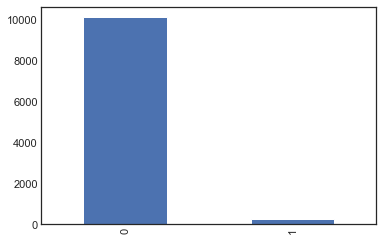

In [140]:
data["isBad"].value_counts().plot(kind="bar")
plt.show()

In [141]:
data.groupby("isBad").size().reset_index(name="count")

isBad  count
0      0  10095
1      1    261

# &#127830;Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
(X_data: ÏûëÏÑ±Ïûê+ÎåìÍ∏ÄÎÇ¥Ïö©), (Y_data: 0 or 1 Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞) Î°ú ÏÑ§Ï†ï

In [142]:
X_data = data["authorAndTextOriginal"]
Y_data = data["isBad"]

    + Ï†ÑÏ≤¥ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º 1,000Í∞úÎ°ú Ï†úÌïúÌïòÍ≥† Ï†ïÏàò Ïù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [143]:
vocab_size = 1000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

In [144]:
import pickle
with open('model/tokenizer.pkl', 'wb') as output:
   pickle.dump(tokenizer, output, pickle.HIGHEST_PROTOCOL)

    + ÏÉÅÏúÑ 5Í∞úÏùò ÏÉòÌîåÏùÑ Ï∂úÎ†•Ìï¥Î¥ÖÏãúÎã§. Î¨∏ÏûêÍ∞Ä Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî©Îêú Í≤∞Í≥º

In [145]:
sequences[:5]

[[220, 11],
 [126, 26, 616, 382, 617],
 [313, 21, 220, 266, 131, 21],
 [656, 764, 221, 116, 697],
 [48, 7, 313, 618, 413, 27]]

    + Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• Í∏∏Ïù¥Í∞Ä Í∏¥ ÎåìÍ∏ÄÍ≥º Ï†ÑÏ≤¥ ÎåìÍ∏Ä Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥ Î∂ÑÌè¨

In [146]:
X_data = sequences

print('ÎåìÍ∏Ä ÏµúÎåÄ Í∏∏Ïù¥: {}'.format(max(len(l) for l in X_data)))
print('ÎåìÍ∏Ä ÌèâÍ∑† Í∏∏Ïù¥: {}'.format((sum(map(len, X_data))/len(X_data))))

ÎåìÍ∏Ä ÏµúÎåÄ Í∏∏Ïù¥: 181
ÎåìÍ∏Ä ÌèâÍ∑† Í∏∏Ïù¥: 2.9207222865971416


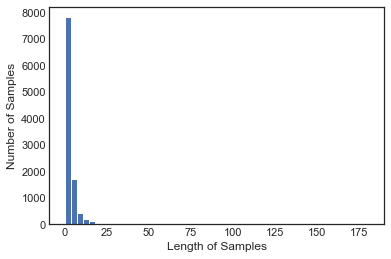

In [147]:
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

    + Í∞ÄÏû• Í∏¥ ÎåìÍ∏ÄÏùò Í∏∏Ïù¥Îäî 181Ïù¥Î©∞, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥ Î∂ÑÌè¨Îäî ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú ÏïΩ 25~30Ïù¥ÌïòÏùò Í∏∏Ïù¥Î•º Í∞ÄÏßÄÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

In [148]:
max_len = 181
data = pad_sequences(X_data, maxlen=max_len)
print(data.shape)

(10356, 181)


    + maxlenÏóêÎäî Í∞ÄÏû• Í∏¥ ÎåìÍ∏ÄÏùò Í∏∏Ïù¥ÏòÄÎçò 181Ïù¥ÎùºÎäî Ïà´ÏûêÎ•º ÎÑ£ÏóàÏäµÎãàÎã§.
    
    + Ïù¥Îäî 10,356Í∞úÏùò dataÏùò Í∏∏Ïù¥Î•º Ï†ÑÎ∂Ä 181Î°ú Î∞îÍøâÎãàÎã§. 181Î≥¥Îã§ Í∏∏Ïù¥Í∞Ä ÏßßÏùÄ ÎåìÍ∏Ä ÏÉòÌîåÏùÄ Ï†ÑÎ∂Ä Ïà´Ïûê 0Ïù¥ Ìå®Îî©ÎêòÏñ¥ 181Ïùò Í∏∏Ïù¥Î•º Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§.

    + Ïù¥Ï†ú data Îç∞Ïù¥ÌÑ∞Îäî 10,356 √ó 181Ïùò ÌÅ¨Í∏∞Î•º Í∞ñÍ≤åÎê©ÎãàÎã§. Ïù¥Ï†ú n_trainÍ≥º n_testÎ•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§.

In [149]:
 n_train = int(len(sequences) * 0.8)
 n_test = int(len(sequences) - n_train)

 print(n_train)
 print(n_test)

8284
2072


    + dataÎ•º 8:2Î°ú trainÍ≥º testÎ°ú ÎÇòÎàÑÏñ¥ Ï†ÄÏû•

In [150]:
X_train = data[:n_train]
Y_train = np.array(Y_data[:n_train])
X_test = data[n_train:]
Y_test = np.array(Y_data[n_train:])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8284, 181)
(8284,)
(2072, 181)
(2072,)


# &#127867;Î™®Îç∏ Íµ¨ÏÑ±ÌïòÍ∏∞
Ï†ÄÎèÑ Îî∞ÎùºÌïú Í±∞Îùº..
ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÄ wikidocsÏôÄ Ïú†ÌäúÎ∏å ÎßÅÌÅ¨Î•º Ï∞∏Í≥†Ìï¥Ï£ºÏÑ∏Ïöî.&#128514;


- [Ïú†ÌäúÎ∏å - Ïù¥ÏàòÏïàÏª¥Ìì®ÌÑ∞Ïó∞Íµ¨ÏÜå](https://www.youtube.com/watch?v=QejZQ0Dh5x8&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=11 "CNN spam video")

- [wikidocs - Îî•Îü¨ÎãùÏùÑÏù¥Ïö©ÌïúÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ÏûÖÎ¨∏ ](https://wikidocs.net/80783 "CNN spam wikidocs")

In [162]:
# Î™®Îç∏ Íµ¨ÏÑ±
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [163]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, strides=1, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [164]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('model/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)  # Î™®Îç∏ Ï†ÄÏû•ÌïòÍ∏∞

In [165]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[es, mc])

Epoch 1/10
104/104 [==============================] - 2s 13ms/step - loss: 0.2138 - acc: 0.9657 - val_loss: 0.1226 - val_acc: 0.9753

Epoch 00001: val_acc improved from -inf to 0.97526, saving model to model\best_model.h5
Epoch 2/10
104/104 [==============================] - 1s 12ms/step - loss: 0.1013 - acc: 0.9745 - val_loss: 0.0694 - val_acc: 0.9837

Epoch 00002: val_acc improved from 0.97526 to 0.98371, saving model to model\best_model.h5
Epoch 3/10
104/104 [==============================] - 1s 13ms/step - loss: 0.0435 - acc: 0.9902 - val_loss: 0.0426 - val_acc: 0.9922

Epoch 00003: val_acc improved from 0.98371 to 0.99215, saving model to model\best_model.h5
Epoch 4/10
104/104 [==============================] - 1s 13ms/step - loss: 0.0323 - acc: 0.9920 - val_loss: 0.0391 - val_acc: 0.9922

Epoch 00004: val_acc did not improve from 0.99215
Epoch 5/10
104/104 [==============================] - 1s 12ms/step - loss: 0.0268 - acc: 0.9935 - val_loss: 0.0359 - val_acc: 0.9922

Epoch 0000

# &#128200;Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞

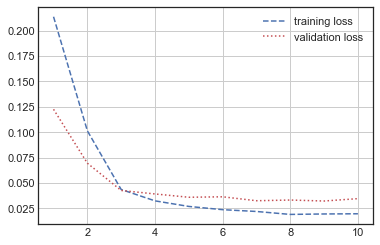

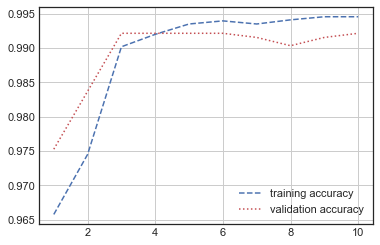

In [166]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy ')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()
plt.show()

In [167]:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('best_model.h5')
# loaded_model.evaluate(X_test, Y_test)
model.evaluate(X_test, Y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.0218 - acc: 0.9952


[0.021802743896842003, 0.9951737523078918]

# &#128583;Ïã§Ï†ú ÎåìÍ∏Ä, Î™®Îç∏Î°ú ÏòàÏ∏°ÌïòÍ∏∞

In [168]:
# Î™®Îç∏ ÏòàÏ∏°
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [174]:
loaded_model = load_model('model/best_model.h5')
with open('model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)
max_len = 181
def predict_comment(new_sentence):
    pattern = '[^Í∞Ä-Ìû£ ]|[\t\n\r\f\v]|([„Ñ±-„Öé„Öè-„Ö£]+)'
    new_sentence = re.sub(pattern, '', new_sentence)
    new_token = new_sentence.split()
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(loaded_model.predict(new_pad))

    # print("score: ", score)
    if score > 0.5:
        print("- {} -> ÎÇòÏÅ®({:.2f}%)".format(new_sentence, score*100))
    else:
        print("- {} -> Í¥úÏ∞ÆÏùå({:.2f}%)".format(new_sentence, (1-score)*100))

In [175]:
predict_comment("Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú")
predict_comment("ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî")
predict_comment("Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú")
predict_comment("ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî")
predict_comment("ÌóàÏ§ÄÎ≤î ÎÑàÎ¨¥ Ïû¨Î∞åÍ≥†")
predict_comment("ÏÇ¨Ï£ºÌã∞ÎπÑ Ï†ÑÏßÅ ÏïÑÏù¥Îèå Ï∂úÏã† ÎπÑÏ†úÏù¥ Ïä§ÌÉÄÌÇπ Í∞úÏ∞¢Îäî Î∞©ÏÜ°ÌïòÎÑπ...")
predict_comment("Î≥µÏû°Ìïú ÏóîÏßÄÎãàÏñ¥ÎßÅ 09:54 Í∑ºÎûòÏóê Î≥∏ Ìé∏ÏßëÏ§ëÏóê Í∞ÄÏû• ÏßúÎ¶øÌñàÏäµÎãàÎã§. Ìé∏ÏßëÏûêÎãò.")
predict_comment("Ï†ú Ï±ÑÎÑêÏóê Ï†àÎåÄ Îì§Ïñ¥Ïò§ÏßÄÎßàÏÑ∏Ïöî!!! Ï†ú ÏÉ§ÏßÑ Ï†àÎåÄÎ°ú Î≥¥Î©¥ ÏïàÎèºÏöî!!")
predict_comment("Ïã†ÏßÑÏäπ ÏôÄ Ïù¥Í≤åÎ≠êÎùºÍ≥† ÏûêÍæ∏ Îì£Í≤åÎêòÏßÄ ÎØ∏ÏπòÍ≤†ÎÑ§")

- Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú -> ÎÇòÏÅ®(93.21%)
- ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî -> ÎÇòÏÅ®(97.51%)
- Í≥ºÏó∞ ÌÄ¥Ï¶à Íµ¨ÎèÖÏïàÌïòÎ©¥ ÏòÅÏõêÌûà ÏÜîÎ°ú -> ÎÇòÏÅ®(93.21%)
- ÎØ∏ÏÖòÌéòÏù¥ Ï†ú Ï≤¥ÎÑêÏóêÏÑú Î¨¥Î£åÎ°ú ÎèàÎ≤ÑÏÑ∏Ïöî -> ÎÇòÏÅ®(97.51%)
- ÌóàÏ§ÄÎ≤î ÎÑàÎ¨¥ Ïû¨Î∞åÍ≥† -> Í¥úÏ∞ÆÏùå(99.15%)
- ÏÇ¨Ï£ºÌã∞ÎπÑ Ï†ÑÏßÅ ÏïÑÏù¥Îèå Ï∂úÏã† ÎπÑÏ†úÏù¥ Ïä§ÌÉÄÌÇπ Í∞úÏ∞¢Îäî Î∞©ÏÜ°ÌïòÎÑπ -> Í¥úÏ∞ÆÏùå(89.64%)
- Î≥µÏû°Ìïú ÏóîÏßÄÎãàÏñ¥ÎßÅ  Í∑ºÎûòÏóê Î≥∏ Ìé∏ÏßëÏ§ëÏóê Í∞ÄÏû• ÏßúÎ¶øÌñàÏäµÎãàÎã§ Ìé∏ÏßëÏûêÎãò -> Í¥úÏ∞ÆÏùå(99.15%)
- Ï†ú Ï±ÑÎÑêÏóê Ï†àÎåÄ Îì§Ïñ¥Ïò§ÏßÄÎßàÏÑ∏Ïöî Ï†ú ÏÉ§ÏßÑ Ï†àÎåÄÎ°ú Î≥¥Î©¥ ÏïàÎèºÏöî -> ÎÇòÏÅ®(95.13%)
- Ïã†ÏßÑÏäπ ÏôÄ Ïù¥Í≤åÎ≠êÎùºÍ≥† ÏûêÍæ∏ Îì£Í≤åÎêòÏßÄ ÎØ∏ÏπòÍ≤†ÎÑ§ -> Í¥úÏ∞ÆÏùå(99.16%)


# &#9989;Ïã§Ï†ú Ïú†ÌäúÎ∏å ÎåìÍ∏ÄAPIÎ°ú ÌôïÏù∏ ÌõÑ ÎåìÍ∏Ä Ï∞®Îã®ÌïòÍ∏∞.
## 03_project_eraseData_API.py ÌååÏùº Ïã§ÌñâÌïòÍ∏∞
### https://www.youtube.com/watch?v=49ysegAFDoY

In [172]:
%run 03_project_eraseData_API.py

-  Î∞ïÏÑ∏ÏßÑÏãúÍ∞Ñ Ï†ÑÎÇ¥Í∞ÄÎ≥¥Í∏∞ÏóêÎäî ÌîºÏßÄÏª¨ÏùÄ ÏõêÌÉëÏù¥Îã§ -> Í¥úÏ∞ÆÏùå(99.14%)
-  Í≥µÏñ¥ ÎÇ¥ Ï±ÑÎÑê Îì§Ïñ¥Ïò§ÏßÄ ÎßàÎùºÏãúÍ∞Ñ Ï†ÑÌóê ÏóÑÏ≤≠ Ïú†Î™ÖÌïú Ïó≠ÎåÄÍ∏â ÎÑàÏ∂úÏÇ¨Í≥† ÌÑ∞ÏßÑÍ±∞ Í∞ôÏïÑÎÇ¥Ïú†Ìä≠Ïóê Î≥º Ïàò ÏûàÎäîÏ¢åÌëú Ïò¨Î†§ÎíÄÏúºÎãàÍπê Ïß§Î¶¨Í∏∞Ï†ÑÏóê Î¥ê -> ÎÇòÏÅ®(89.23%)
-  Ï†ÄÍ≤å Í≤ΩÏüÅ ÏÜîÏøºÎìúÎùºÍ≥† Îú®Îú®ÎãòÏùò ÌïúÍ≥ÑÎûÄ Í≥ºÏó∞ Ïñ¥ÎîîÍπåÏßÄÏù∏Í≤ÉÏù∏Í∞Ä -> Í¥úÏ∞ÆÏùå(99.15%)
-  Ï≤úÏÉÅÍ≥Ñ Í≤ΩÍ∏∞ Î≥¥Î©¥ Î¨¥Ïä® Î¨¥ÌòëÏßÄ Í∞ôÏùå  -> Í¥úÏ∞ÆÏùå(99.14%)
-  ÎùºÎéÉÌòï Î™∏ÏÑúÎ¶¨ ÏπòÎÑ§  -> Í¥úÏ∞ÆÏùå(99.14%)
-  ÏïåÎú∞Ìïú ÌïòÏú§Ïù¥ Ï†ú Ï±ÑÎÑê Ïò§ÏÖîÏÑúÍΩÅÎèà Î∞õÏïÑÍ∞ÄÏÑ∏Ïö©Ïñ¥Í∑∏Î°ú ÏïÑÎãàÏóêÏö© -> Í¥úÏ∞ÆÏùå(93.75%)
-  Ï§ëÏã¨Ìã∞ÎπÑ Ï†ÑÏßÅ ÏïÑÏù¥Îèå Ïó∞ÏäµÏÉù Ï∂úÏã† ÎπÑÏ†úÏù¥ Ïä§ÌÉÄÌÇπ Í∞úÏ∞¢Îäî Î∞©ÏÜ°ÌïòÎÑπÎÇ¥ÌîÑÎ°úÌïÑ ÏôÄÏÑú Î≥¥Í≥†Í∞ÄÏö© -> ÎÇòÏÅ®(85.97%)
-  Í∞ÄÏπòÌã∞ÎπÑ ÏßÑÏã¨ Ï°¥ÎÇò Ïú†Î™ÖÌïú Î∞©ÏÜ°ÌïòÎã§Í∞Ä ÏùòÏÉÅ Ï†úÎåÄÎ°ú ÎÇ¥Î†§Í∞ÑÎìØÎÇ¥Í∫º Îì§Ïñ¥Ïò§Î©¥ Î≥º Ïàò ÏûàÎäîÏ¢åÌëú Ï∞çÏñ¥ÎëòÍ≤å -> ÎÇòÏÅ®(87.88%)
-  Ï†ú Ï±ÑÎÑêÏóê ÍΩÅÏßúÎ°ú ÎèàÎ≤ÑÎäîÎ≤ï ÎÇòÏôÄÏûàÏäµÎãàÎã§ -> Í¥úÏ∞Æ

# &#128586;Í∞êÏÇ¨Ìï©ÎãàÎã§!
## + Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÏÅú ÎåìÍ∏ÄÎì§ÏùÑ Îã§ÏñëÌïòÍ≤å ÎßéÏù¥ ÏàòÏßëÌïòÎ©¥ Îçî Ï†ïÌôïÌïú Î™®Îç∏ÏùÑ ÎßåÎì§ Ïàò ÏûàÏßÄ ÏïäÏùÑÍπå???
## + ÏòÅÏñ¥ÎÇò ÌäπÏàòÎ¨∏ÏûêÎäî ÏïÑÏòà Ï≤òÎ¶¨Î•º ÏïàÌïòÎèÑÎ°ù ÌñàÎäîÎç∞ Ï∞∏Ïã†Ìïú ÎåìÍ∏ÄÏùÄ Ïñ¥Ï∞å Ï≤òÎ¶¨Ìï¥ÏïºÌï†Íπå???